# Monte Carlo Simulator Scenarios

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from operator import concat

from montecarlo import *

## Scenario 1 : 2-headed coin

### 1.

In [2]:
fair_coin = Die(["H", "T"])
unfair_coin = Die(["H","T"])
unfair_coin.w_change("H",5)

### 2. & 3.

In [3]:
fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(1000)

### 3.

In [4]:
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_game.play(1000)

### 4.

In [5]:
fair_anal = Analyzer(fair_game)
unfair_anal = Analyzer(unfair_game)
fa_jackpots = fair_anal.jackpot()
ua_jackpots = unfair_anal.jackpot()

### 5.

In [6]:
print(fa_jackpots / 1000)
print(ua_jackpots / 1000)

0.248
0.344


### 6.

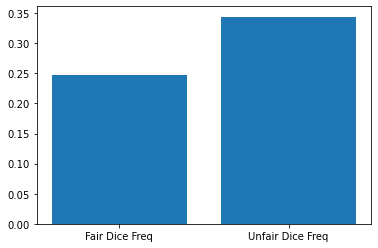

In [7]:
freq_dict = {"Fair Dice Freq":fa_jackpots / 1000, "Unfair Dice Freq": ua_jackpots / 1000}
plt.bar(freq_dict.keys(), freq_dict.values());

## Scenario 2 : 6-sided die

### 1.

In [8]:
fair_die = Die(list(range(1,7)))
unfair_die1 = Die(list(range(1,7)))
unfair_die1.w_change(6,5)
unfair_die2 = Die(list(range(1,7)))
unfair_die2.w_change(1,5)

### 2.

In [9]:
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game.play(10000)

### 3.

In [10]:
unfair_game = Game([unfair_die1, unfair_die2, fair_die, fair_die, fair_die])
unfair_game.play(10000)

In [11]:
fair_anal = Analyzer(fair_game)
unfair_anal = Analyzer(unfair_game)

### 4.

0.0008
0.0012


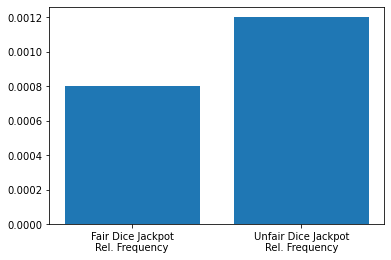

In [12]:
fa_jackpots = fair_anal.jackpot()
ua_jackpots = unfair_anal.jackpot()

print(fa_jackpots / 10000)
print(ua_jackpots / 10000)

freq_dict = {"Fair Dice Jackpot\nRel. Frequency":fa_jackpots / 10000, "Unfair Dice Jackpot\nRel. Frequency": ua_jackpots / 10000}
plt.bar(freq_dict.keys(), freq_dict.values());

### 5.

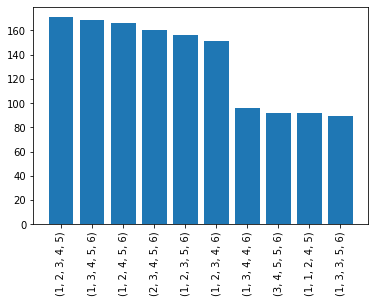

In [13]:
fair_anal.combo()


f_data= fair_anal.combo.head(10)
x = f_data.values.tolist()
y = f_data.index.tolist()
x = [s[0] for s in x]
y = [str(t) for t in y]

plt.xticks(rotation='vertical')
plt.bar(y,x);

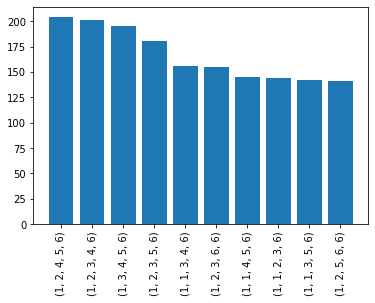

In [14]:
unfair_anal.combo()
u_data= unfair_anal.combo.head(10)
x = u_data.values.tolist()
y = u_data.index.tolist()
x = [s[0] for s in x]
y = [str(t) for t in y]

plt.xticks(rotation='vertical')
plt.bar(y,x);

## Scenario 3 : Alphabet

### 1.

In [15]:
letter_weights = [8.4966, 2.072, 4.5388, 3.3844, 11.1607, 
                1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 
                1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 
                3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 
                3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 
                0.2722]

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
           'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
           'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [16]:
alpha = Die(letters)

for x in range(len(letter_weights)):
    alpha.w_change(letters[x], letter_weights[x])

### 2.

In [17]:
alpha_game = Game([alpha, alpha, alpha, alpha, alpha])
alpha_game.play(1000)

### 3.

In [18]:
combo = alpha_game.show().values.tolist()
combo = [''.join(x).lower() for x in combo]

from urllib.request import urlopen
words = urlopen("https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt")
wordlist = [line.decode("utf-8") for line in words]
wordlist = [word[:-1] for word in wordlist]

realwords = [i for i in combo if i in wordlist]
print(realwords)

#This will obviously return different values each time, but I get between 1 - 5 real words per 1000 rolls

['primp']


##### This code will return a different number of words each time, but I get around 1-5 words per 1000 rolls

### 4.

##### With an eye count, it appears like there are no words as it's very hard for us to spot the words out of all the nonsense